In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
air = pd.read_csv('Airbnb_Open_Data.csv')
air.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18364\30051441.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  air = pd.read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
data = pd.read_csv('kerala.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
#rainfall more than 500mm in June provided that it flooded

In [8]:
data['Rain_in_June'] = (data['JUN'] > 500).astype(int)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,Rain_in_June
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES,0
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO,1


In [10]:
data['FLOODS'] = data['FLOODS'].map({'YES':1, 'NO':0})

In [15]:
df = data.loc[:, ['YEAR', 'Rain_in_June', 'FLOODS']]
df.head()

,YEAR,Rain_in_June,FLOODS
0,1901,1,1
1,1902,0,1
2,1903,1,1
3,1904,1,1
4,1905,1,0


In [17]:
#cross-tabulation
pd.crosstab(df['FLOODS'], df['Rain_in_June'], margins=True)

Rain_in_June,0,1,All
FLOODS,,,
0,19,39,58
1,6,54,60
All,25,93,118


In [19]:
#prob > 500
p_rain500 = round(93 / 118, 3)
p_rain500

0.788

In [21]:
#prob_floods
p_floods = round(60 / 118, 3)
p_floods

0.508

In [23]:
# p(floods and rain > 500)

p_floodrain = round(54 / 118, 3)
p_floodrain

0.458

In [25]:
# p (floods | rain> 500)
p_flood_given_rain = round(p_floodrain/ p_rain500, 3)
p_flood_given_rain

0.581

In [26]:
#now we need compiment as well

##Problem Statement
What is the probability of rainfall more than 500mm in the month of June, provided that it flooded in that year in Kerala? Calculate using Bayes' Theorem.

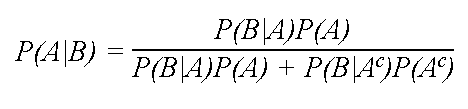

In [27]:
p_lessthan500=round(25/118,3)
#prob. of floods given that it rained less than 500m
p_floods_given_that_it_rained_less=round(6/25,3)
(p_rain500*p_floodrain)/((p_rain500*p_floodrain)+(p_lessthan500*p_floods_given_that_it_rained_less))

0.8764400753793251